In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [ ]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [ ]:
weather_data.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [ ]:
import pandas as pd

# Finding the median
median_value = weather_data.median()

# Finding the mode
mode_value = weather_data.mode().iloc[0]

print("Median:")
print(median_value)

print("\nMode:")
print(mode_value)


Median:
PLANT_ID               4.136001e+06
AMBIENT_TEMPERATURE    2.698126e+01
MODULE_TEMPERATURE     2.753461e+01
IRRADIATION            1.904047e-02
dtype: float64

Mode:
DATE_TIME              2020-05-15 00:00:00
PLANT_ID                         4136001.0
SOURCE_KEY                 iq8k7ZNt4Mwm3w0
AMBIENT_TEMPERATURE              20.942385
MODULE_TEMPERATURE               20.265123
IRRADIATION                            0.0
Name: 0, dtype: object


In [ ]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
25947,2020-05-29 02:15:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,0.000000,282690653.000000
50118,2020-06-09 16:00:00,4136001,xMbIugepa2P7lBB,650.066667,636.786667,7258.666667,106855028.666667
37470,2020-06-03 16:30:00,4136001,4UPUqMRk7TRMgml,258.666667,253.680000,5793.866667,2570094.866667
12226,2020-05-21 03:45:00,4136001,4UPUqMRk7TRMgml,0.000000,0.000000,0.000000,2464264.000000
323,2020-05-15 03:30:00,4136001,oZ35aAeoifZaQzV,0.000000,0.000000,0.000000,1659965051.000000


In [ ]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2765,2020-06-12 20:30:00,4136001,iq8k7ZNt4Mwm3w0,23.816573,22.510074,0.000000
3149,2020-06-16 20:30:00,4136001,iq8k7ZNt4Mwm3w0,24.601791,24.299503,0.000000
200,2020-05-17 02:15:00,4136001,iq8k7ZNt4Mwm3w0,24.467926,22.172177,0.000000
58,2020-05-15 14:30:00,4136001,iq8k7ZNt4Mwm3w0,37.268466,51.358931,0.681066
2795,2020-06-13 04:00:00,4136001,iq8k7ZNt4Mwm3w0,22.450481,21.666627,0.000000


In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [ ]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
54081,2020-06-11 13:15:00,81aHJ1q11NBPMrL,483.933333,474.666667,2407.800000,1215449210.800000,29.485297,36.078476,0.306387
16857,2020-05-23 20:00:00,LlT2YUhhzqhg5Sw,0.000000,0.000000,3385.000000,282645759.000000,32.328881,30.570154,0.000000
30856,2020-05-31 12:45:00,NgDl19wMapZy17u,1162.407143,1134.200000,3833.857143,111642013.857143,34.748582,54.456130,0.860170
43108,2020-06-06 08:30:00,LlT2YUhhzqhg5Sw,722.971429,707.814286,530.285714,282730865.285714,26.750896,36.626016,0.523858
41819,2020-06-05 17:45:00,oZ35aAeoifZaQzV,190.893333,186.900000,7652.200000,1660126305.200000,30.037243,31.976171,0.122307


In [ ]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
std,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


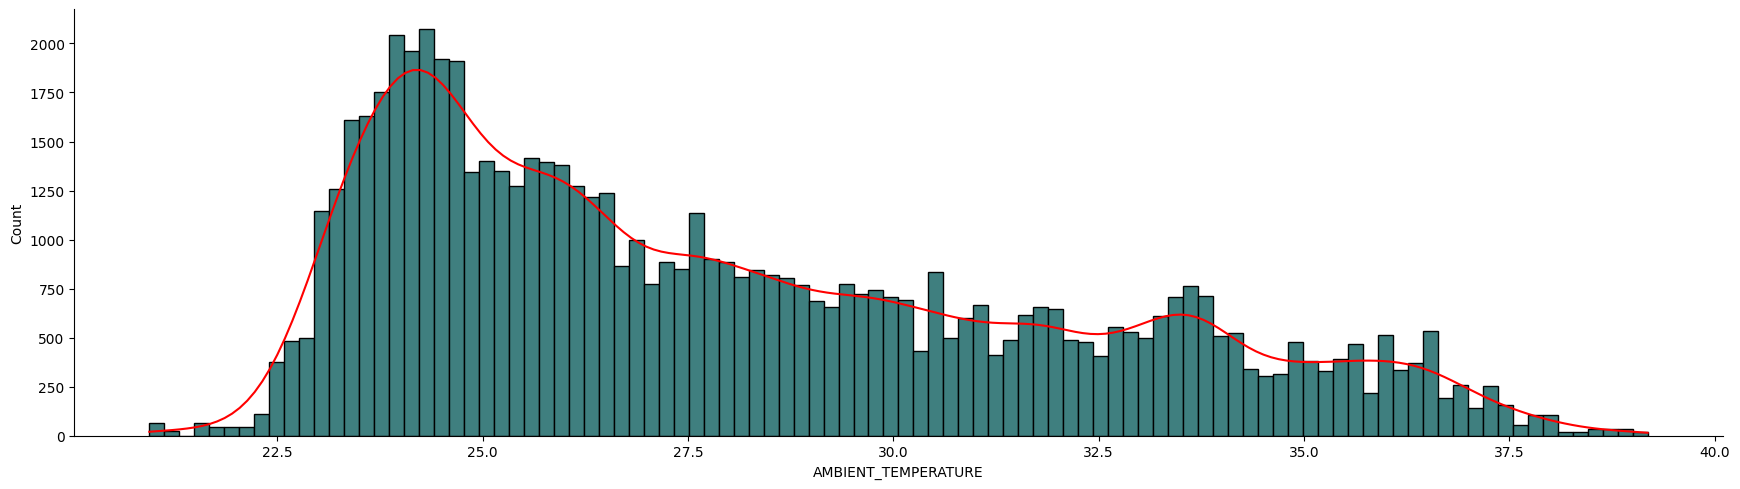

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [ ]:
df_solar['DATE'].nunique()

34

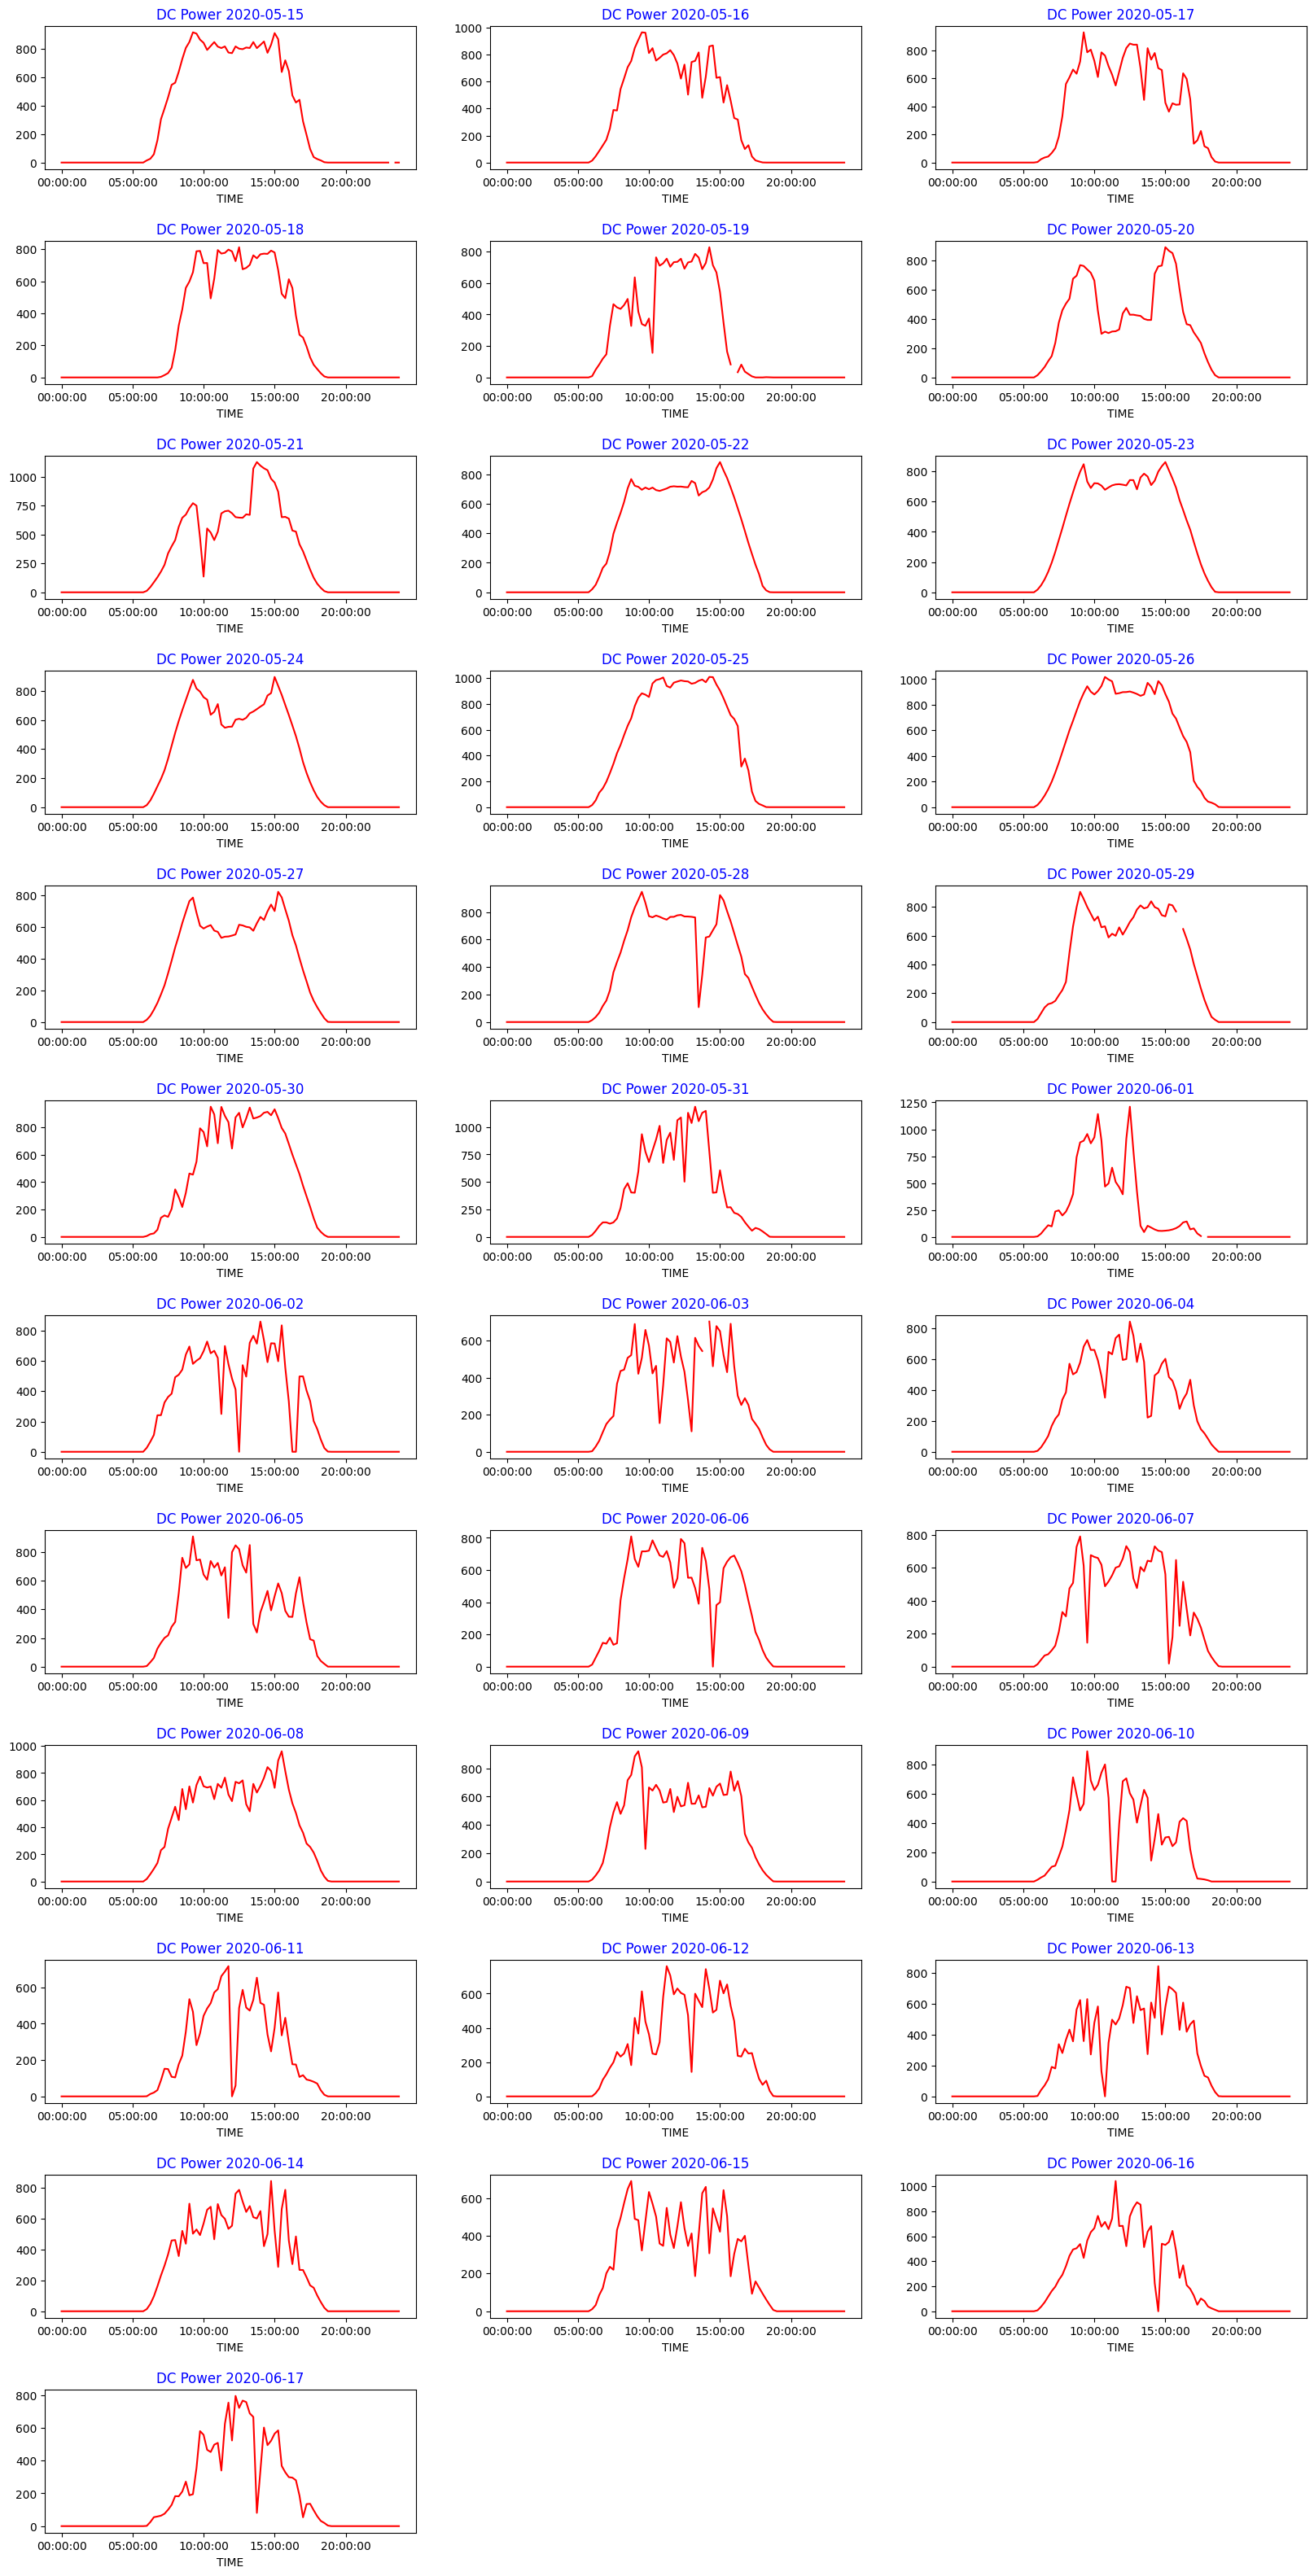

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

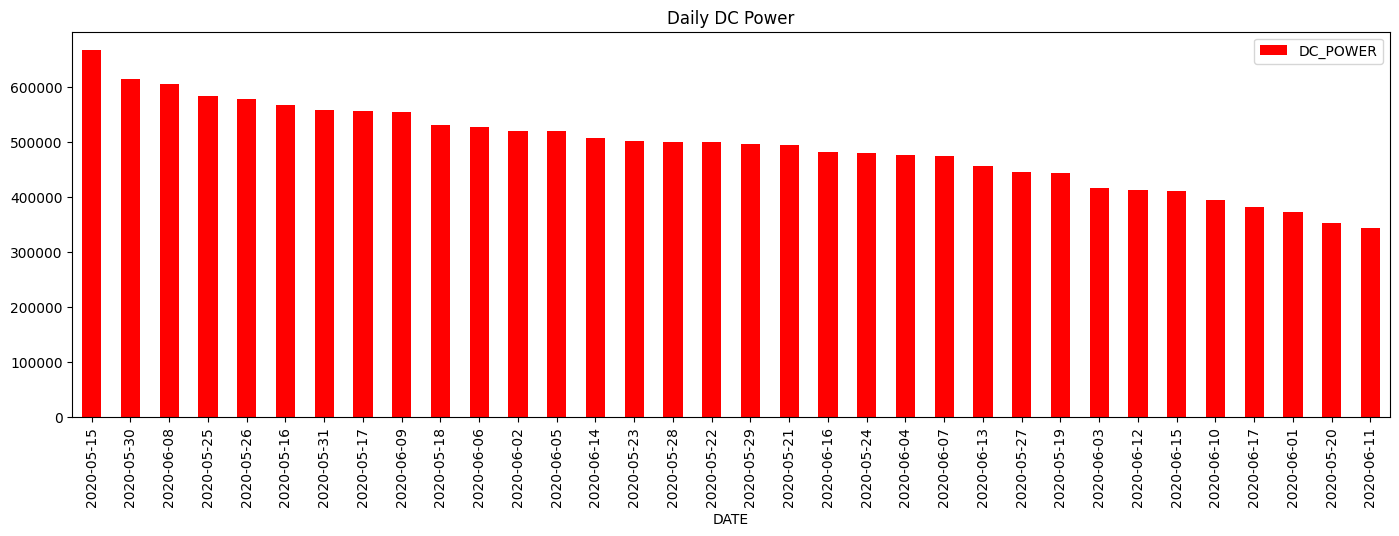

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

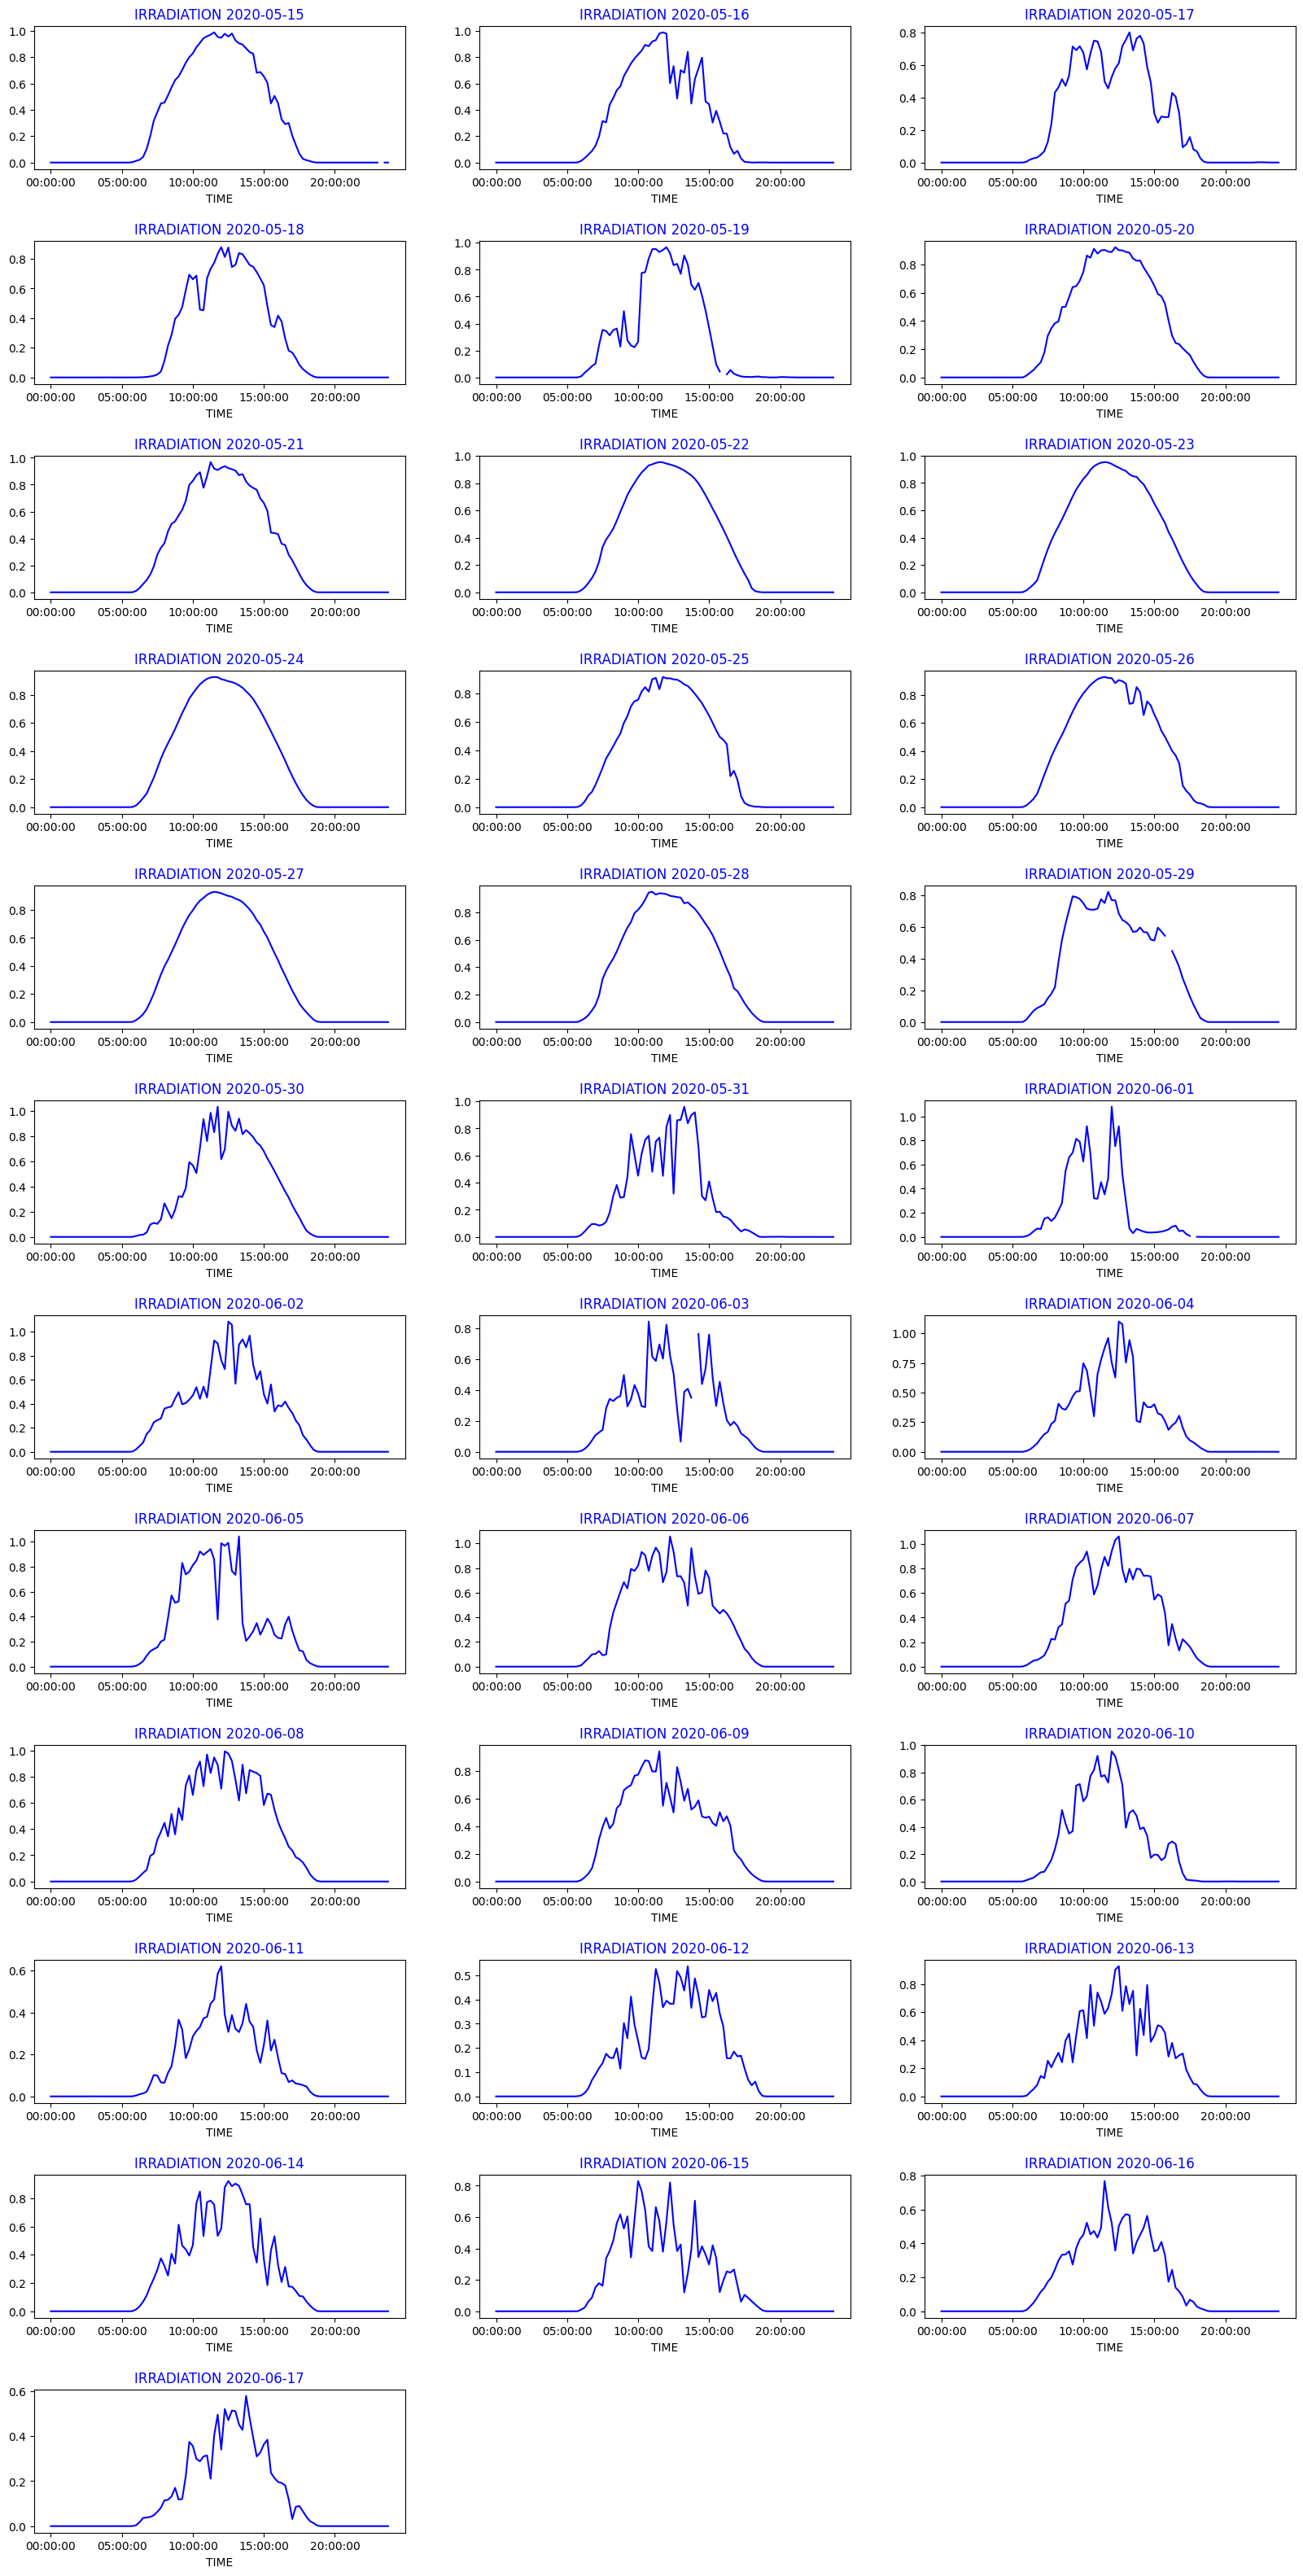

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

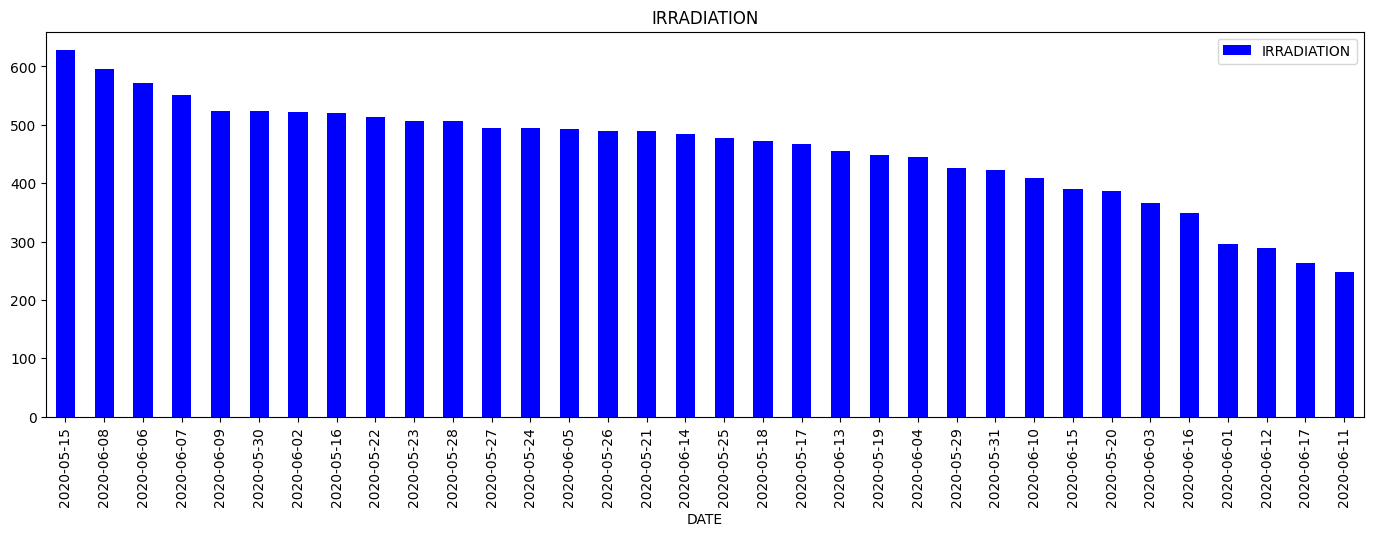

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

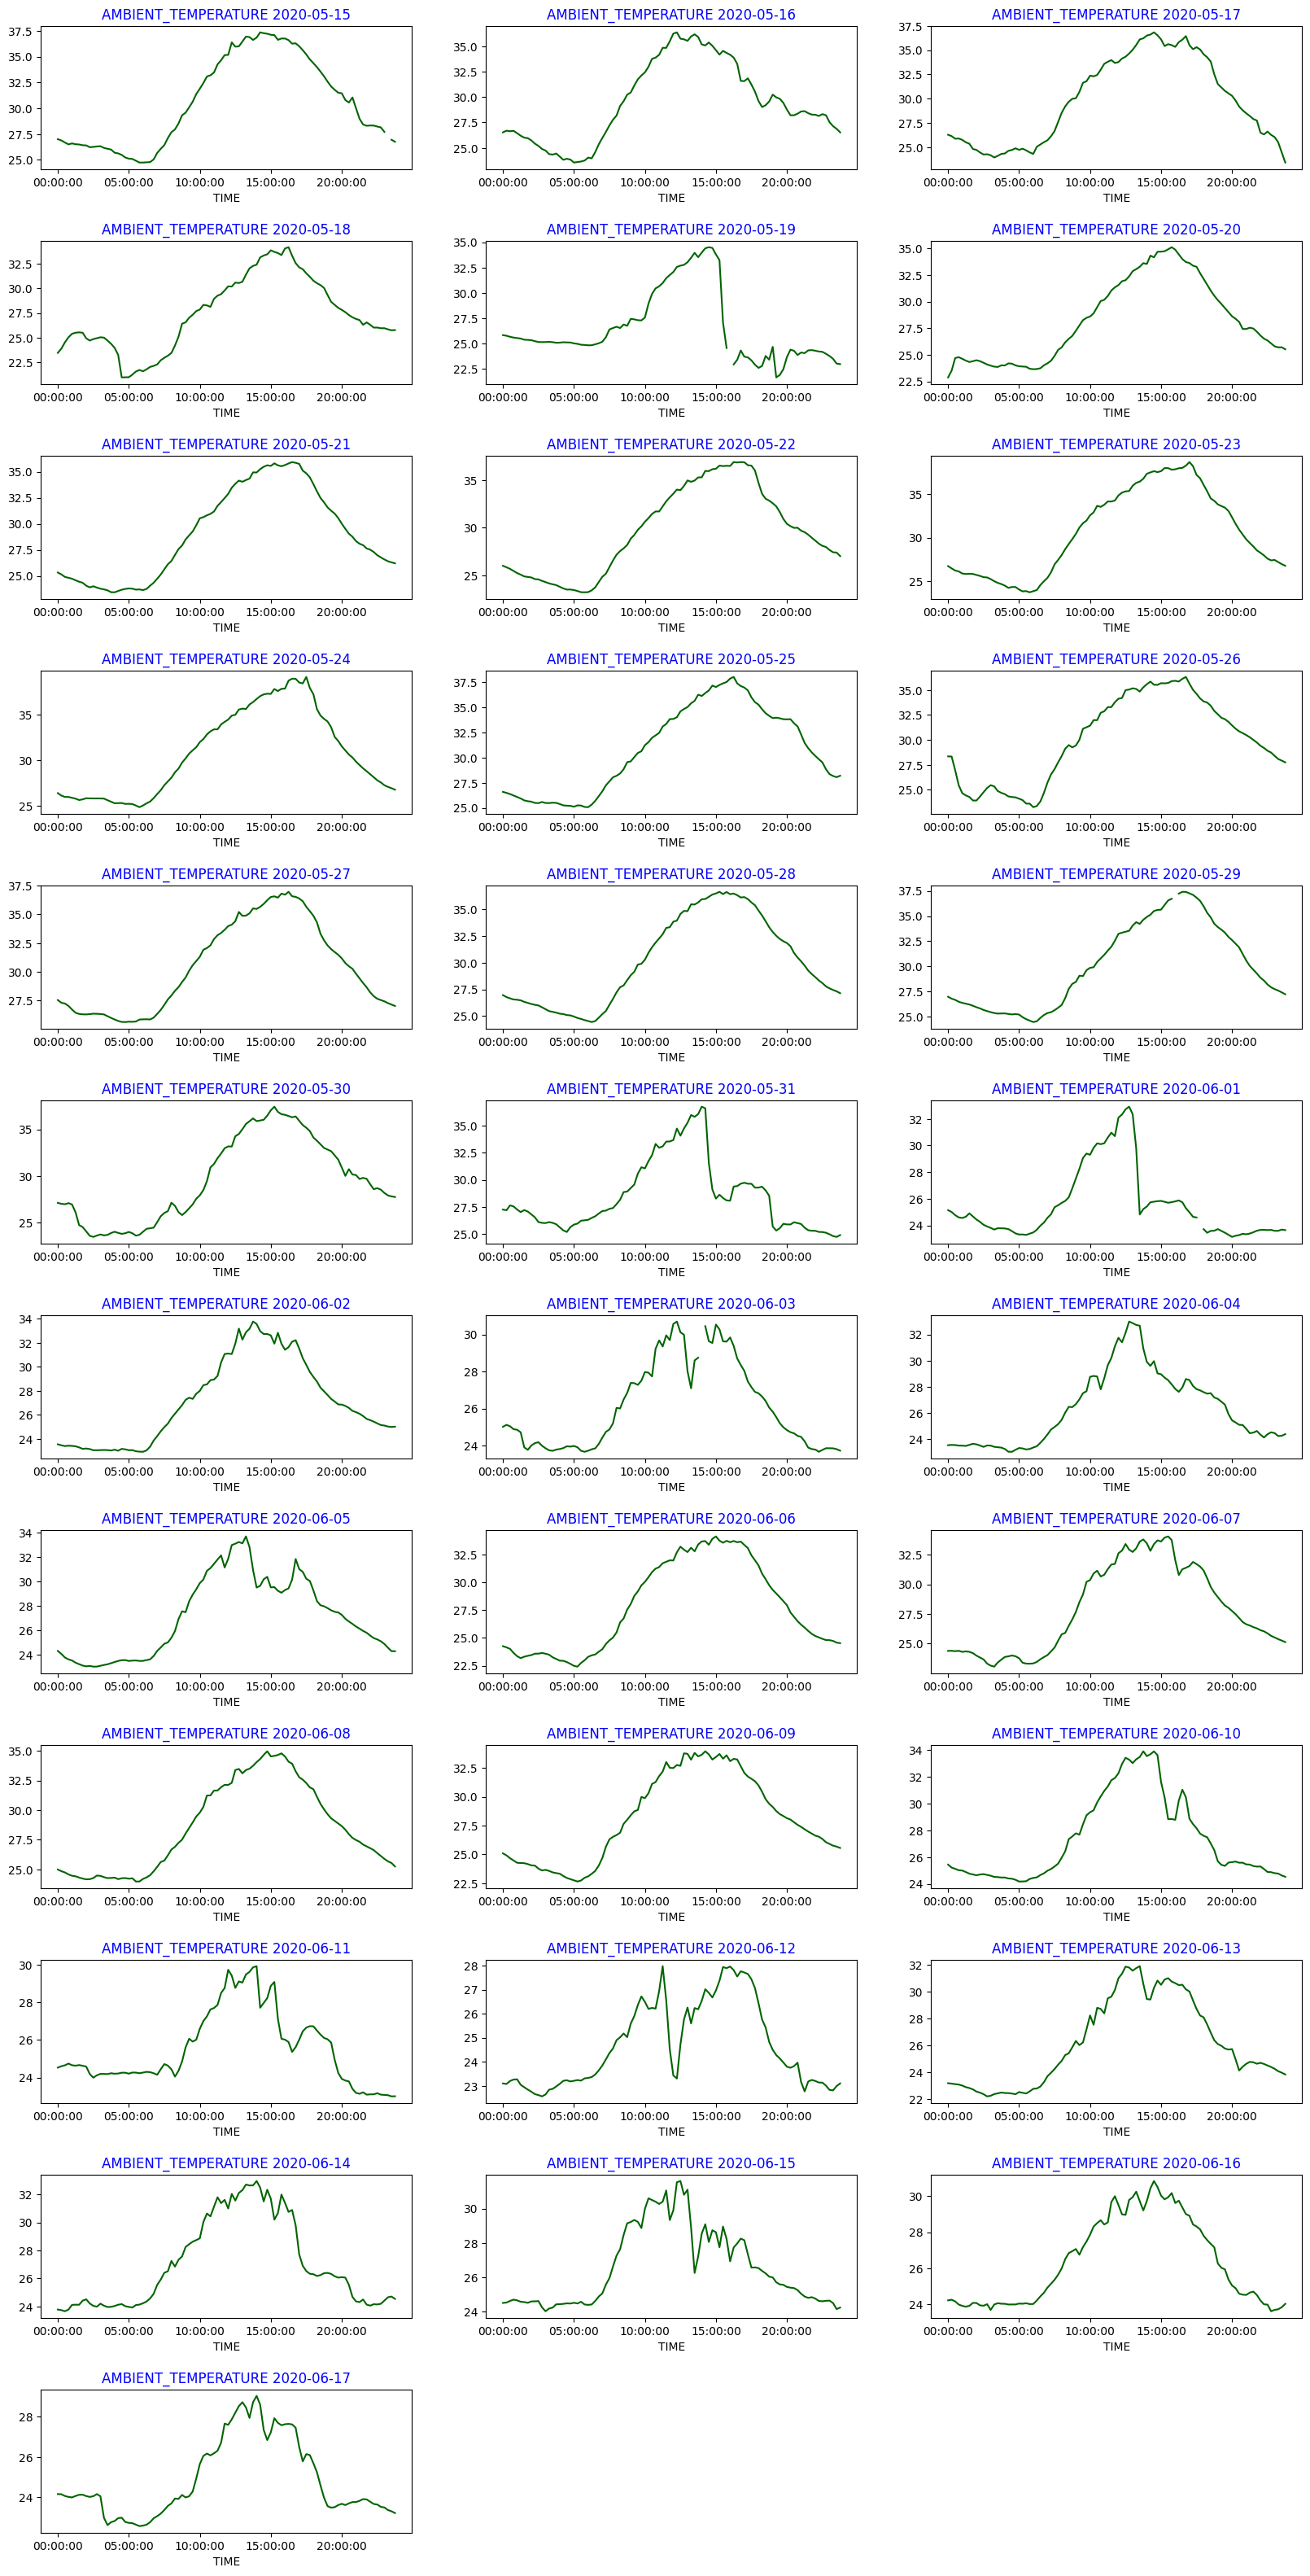

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

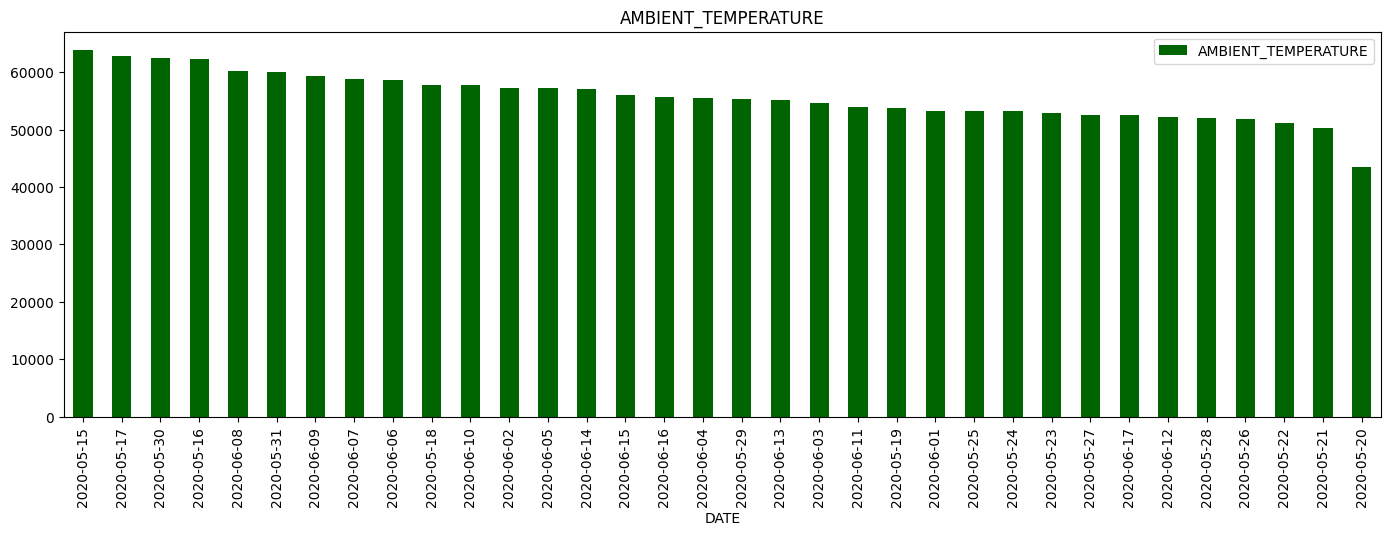

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

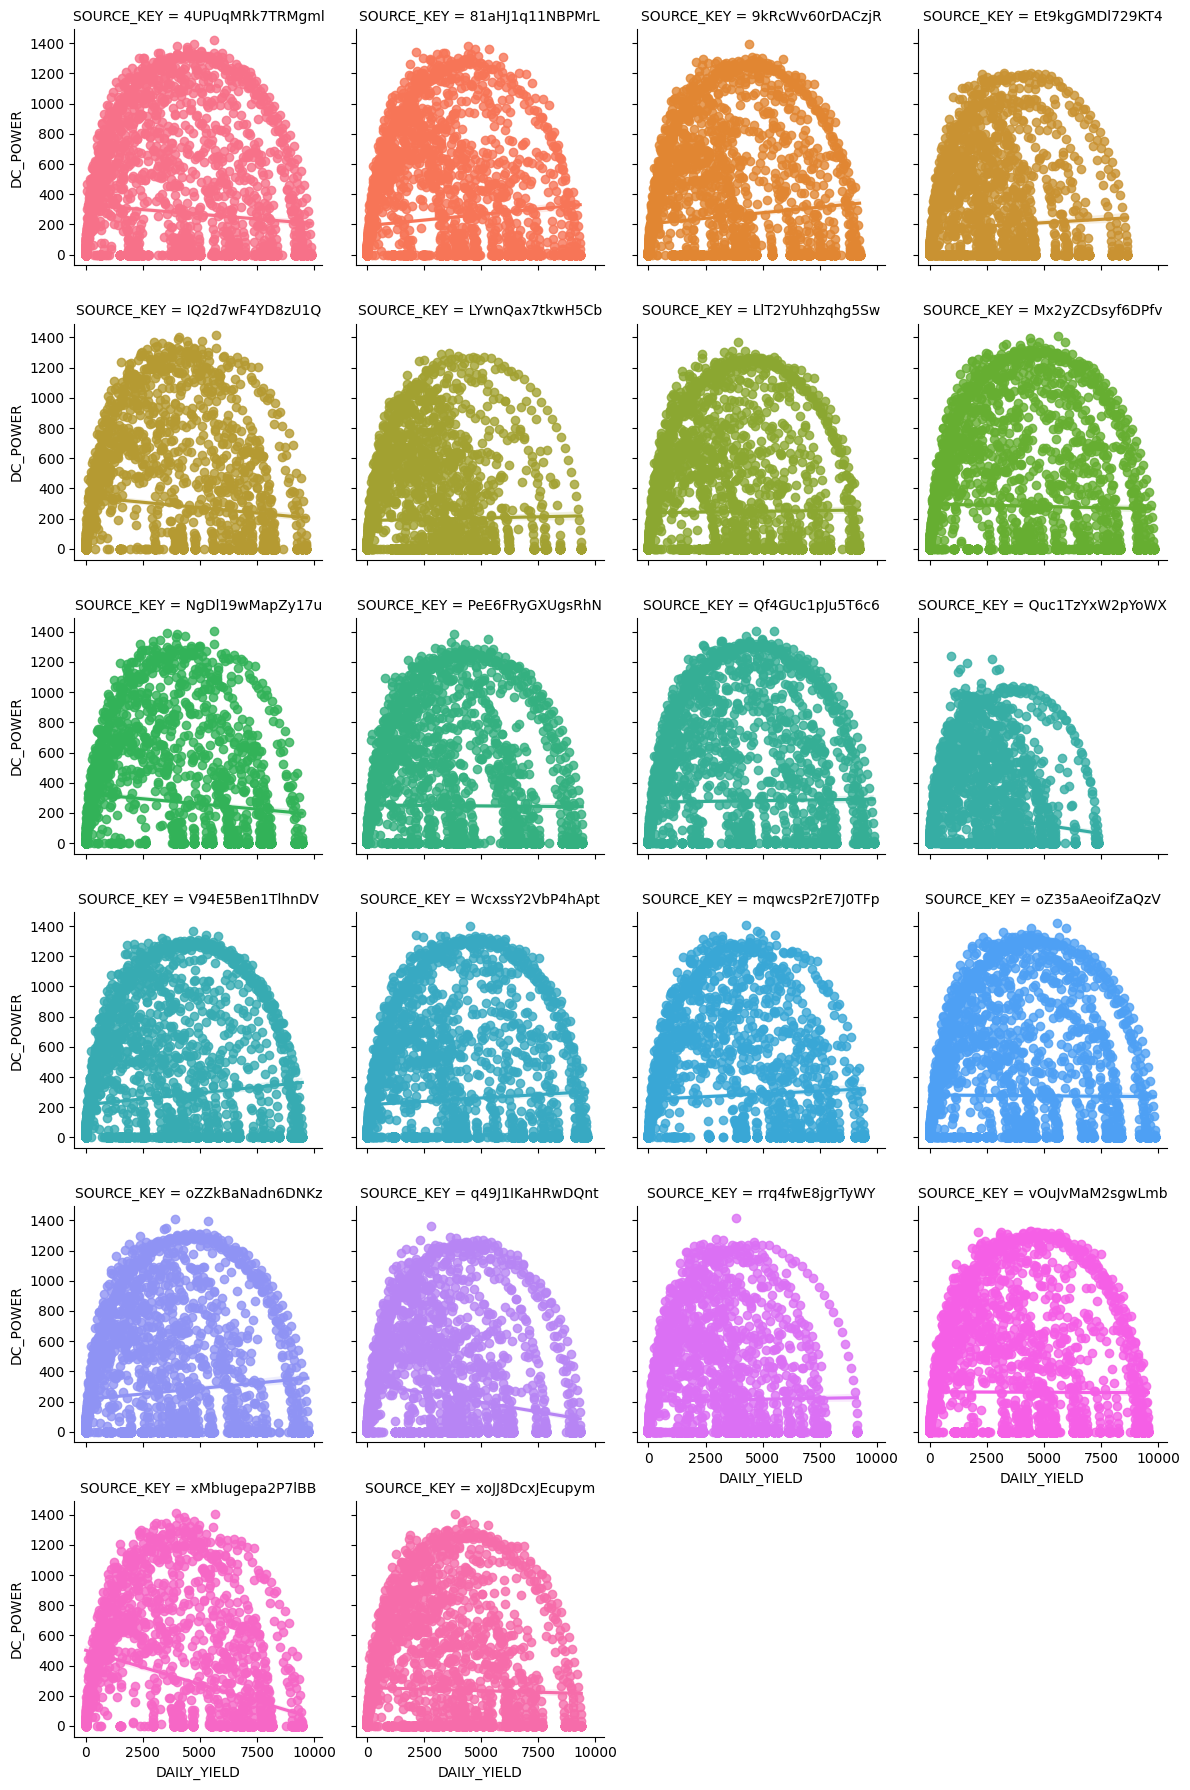

In [ ]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

## **SOLAR POWER PLANT INVERTER EFFICIENCY CALCULATION**

In [ ]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [ ]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

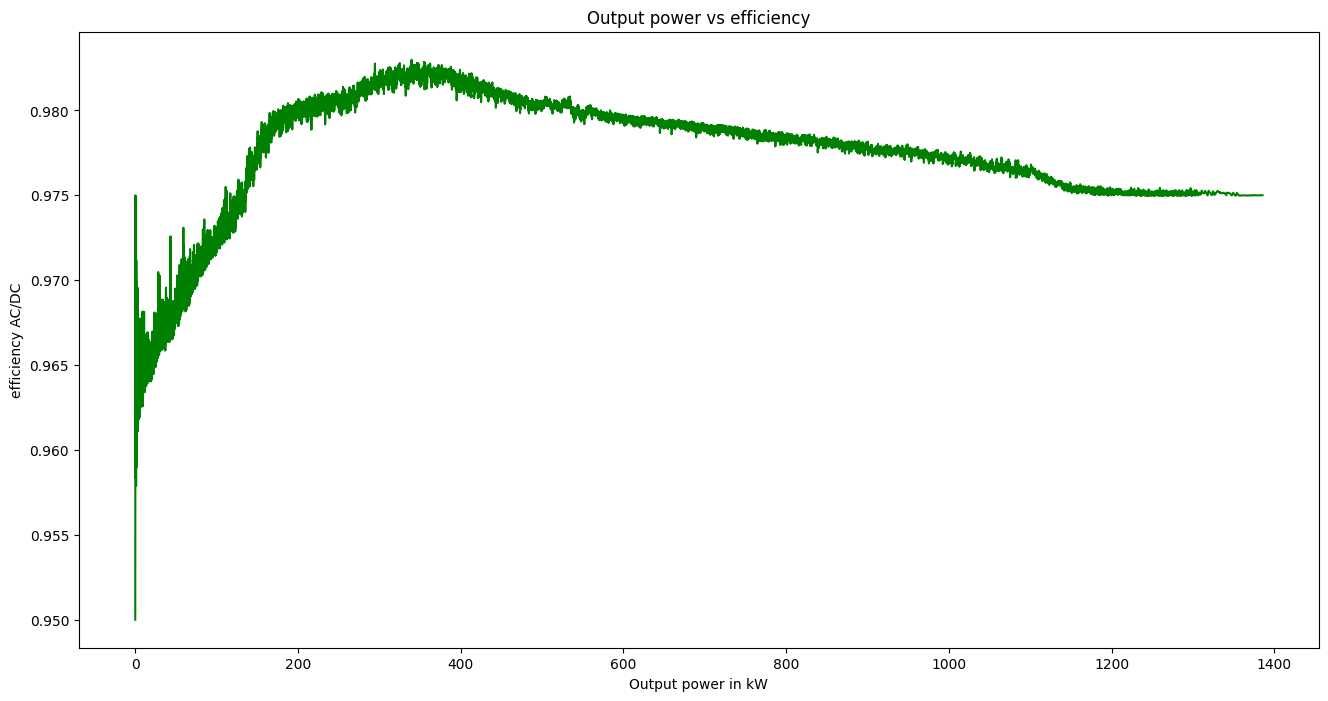

In [ ]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

## ***SOLAR POWER PREDICTION***

In [ ]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [ ]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0.0
1,0.000000,1.215279e+09,27.004764,25.060789,0.0,0.0
2,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0.0
3,269.933333,1.704250e+06,27.004764,25.060789,0.0,0.0
4,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse_lr:4.4f}')


rmse_lr = np.sqrt(mse_lr)
print(f'Root Mean Squared Error: {rmse_lr:4.4f}')

R2 Score :  100.0 %
Mean Squared Error: 0.7460
Root Mean Squared Error: 0.8637


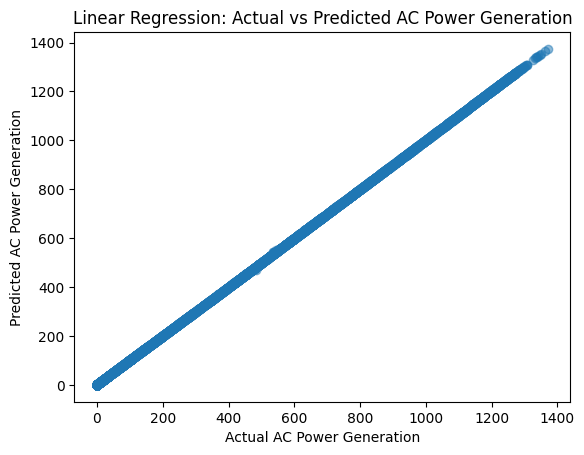

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted AC Power Generation')
plt.xlabel('Actual AC Power Generation')
plt.ylabel('Predicted AC Power Generation')
plt.show()

RAMDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(f'Mean Squared Error: {mse_rfr:4.4f}')

rmse_rfr = np.sqrt(mse_rfr)
print(f'Root Mean Squared Error: {rmse_rfr:4.4f}')

R2 Score :  100.0 %
Mean Squared Error: 0.7460
Root Mean Squared Error: 0.8637


DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")


from sklearn.metrics import mean_squared_error
MSE_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error:", MSE_dtr)

from sklearn.metrics import mean_squared_error
RMSE_dtr = np.sqrt(MSE_dtr)
print("Root Mean Squared Error:", RMSE_dtr)



R2 Score :  100.0 %
Mean Squared Error: 0.7460495265578769
Root Mean Squared Error: 0.8637415855207372


RESULT PREDICTION

In [ ]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.70536667 ...    0.         1007.15618571
    0.        ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000000,0.000000
50974,0.000000,0.000000
53919,684.913333,684.705367
2384,0.000000,0.000000
22014,0.000000,0.000000


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000000,0.000000,0.000000
50974,0.000000,0.000000,0.000000
53919,684.913333,684.705367,0.207967
2384,0.000000,0.000000,0.000000
22014,0.000000,0.000000,0.000000


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Calibri',
            'color': 'LigntGreen',
            'font-size': '20px'
        })

,Actual,Predicted,Error
27183,0.000000,0.000000,0.000000
31314,50.266667,50.413319,-0.146652
48572,0.000000,0.000000,0.000000
29629,0.000000,0.000000,0.000000
22339,0.000000,0.000000,0.000000
51205,0.000000,0.000000,0.000000
67269,0.000000,0.000000,0.000000
498,0.000000,0.000000,0.000000
54683,0.000000,0.000000,0.000000
23003,886.106667,885.733352,0.373314


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have already loaded your data into df_solar

# Extracting features and target variable
X = df_solar[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']]
y = df_solar['AC_POWER']

# Step 1: Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Apply PCA
n_components = 3  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

# Concatenate the principal components with the original DataFrame
df_solar_pca = pd.concat([df_solar, df_pca], axis=1)

# Display the explained variance ratio and cumulative explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

# Access the loadings of each principal component
loadings = pca.components_

# Create a DataFrame with loadings for each feature
loadings_df = pd.DataFrame(loadings.T, columns=columns, index=X.columns)

# Display the loadings for each feature
print("\nPrincipal Component Loadings:")
print(loadings_df)

# Identify the most important features based on absolute loading values
most_important_features = loadings_df.abs().idxmax(axis=0)
print("\nMost Important Features:")
print(most_important_features)

Explained Variance Ratio: [0.55005107 0.19268681 0.16292741]
Cumulative Explained Variance: [0.55005107 0.74273787 0.90566528]

Principal Component Loadings:
                          PC1       PC2       PC3
DAILY_YIELD          0.053942  0.856386  0.317619
TOTAL_YIELD         -0.002715 -0.364786  0.930105
AMBIENT_TEMPERATURE  0.471558  0.277810  0.145660
MODULE_TEMPERATURE   0.539519 -0.031550 -0.013357
IRRADIATION          0.515747 -0.199137 -0.098331
DC_POWER             0.466519 -0.125317 -0.054392

Most Important Features:
PC1    MODULE_TEMPERATURE
PC2           DAILY_YIELD
PC3           TOTAL_YIELD
dtype: object
